# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import xlrd
import openpyxl

In [2]:
path="/home/raichuboy/Projects/ML/DL/adobe/Copy of behaviour_content_simulation_train.xlsx"
df= pd.read_excel(path)
print(df.head())

   id                 date  likes  \
0   1  2020-12-12 00:47:00      1   
1   2  2018-06-30 10:04:20   2750   
2   3  2020-09-29 19:47:28     57   
3   4  2020-10-01 11:40:09    152   
4   5  2018-10-19 14:30:46     41   

                                                                                               content  \
0  Spend your weekend morning with a Ham, Egg, and Cheese Wrap paired with a sweet Iced French Vani...   
1                            Watch rapper <mention> freestyle for over an HOUR <hyperlink> <hyperlink>   
2  Canadian Armenian community demands ban on military drone tech exports to Turkey <hyperlink> <hy...   
3  1st in Europe to be devastated by COVID-19, Italy redoubled its efforts, and they're now paying ...   
4  Congratulations to Pauletha Butts of <mention>! She was presented a Beyond the Call Award for he...   

         username  \
0    TimHortonsPH   
1       IndyMusic   
2       CBCCanada   
3  MKWilliamsRome   
4           BGISD   

             

In [3]:
df.describe(include='all')

,id,date,likes,content,username,media,inferred company
count,300000.000000,300000,300000.000000,300000,300000,300000,300000
unique,NaN,292301,NaN,278522,2449,295266,220
top,NaN,2019-06-21 07:00:00,NaN,From <mention> <hyperlink>,IndependentNGR,"[Photo(previewUrl='https://pbs.twimg.com/media/D_0R05xVUAAGhIm?format=jpg&name=small', fullUrl='...",independent
freq,NaN,6,NaN,197,32295,12,39248
mean,150000.500000,NaN,773.364793,NaN,NaN,NaN,NaN
std,86602.684716,NaN,4931.463419,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,75000.750000,NaN,3.000000,NaN,NaN,NaN,NaN
50%,150000.500000,NaN,76.000000,NaN,NaN,NaN,NaN
75%,225000.250000,NaN,364.000000,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [5]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, and Cheese Wrap paired with a sweet Iced French Vani...",TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an HOUR <hyperlink> <hyperlink>,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on military drone tech exports to Turkey <hyperlink> <hy...,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, Italy redoubled its efforts, and they're now paying ...",MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>! She was presented a Beyond the Call Award for he...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent


In [6]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (300000, 7)
Columns are: Index(['id', 'date', 'likes', 'content', 'username', 'media',
       'inferred company'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                300000 non-null  int64 
 1   date              300000 non-null  object
 2   likes             300000 non-null  int64 
 3   content           300000 non-null  object
 4   username          300000 non-null  object
 5   media             300000 non-null  object
 6   inferred company  300000 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB


In [8]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def data_processing(text):
    text= text.lower()
    text= re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text= re.sub(r'\@w+|\#','', text)
    text= re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt to /home/raichuboy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df.content = df['content'].apply(data_processing)

In [10]:
df=df.drop_duplicates('content')

In [11]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how','hyperlink', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me','mention', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(content):
    return " ".join([word for word in str(content).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda content: cleaning_stopwords(content))

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Removing Punctuations

In [13]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,id,date,likes,content,username,media,inferred company,Tweet_punct
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...
5,6,2020-11-15 16:01:08,525,85yearold primary school shanghai lifted ground entirety relocated using new technology dubbed w...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1322382278794858496/img/eKRa2rXni...,cnn,yearold primary school shanghai lifted ground entirety relocated using new technology dubbed wal...
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn unbroken peace law faculty presents book fagbohun,IndependentNGR,"[Photo(previewUrl='https://pbs.twimg.com/media/EHo1yZyU0AIBW8N?format=jpg&name=small', fullUrl='...",independent,lasu celebrates new dawn unbroken peace law faculty presents book fagbohun
7,8,2018-07-17 22:04:26,3,next week cncf publishing series case studies companies leveraging cloudnative technologies powe...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1019341984543268866/img/ieqbfTc82...,cisco,next week cncf publishing series case studies companies leveraging cloudnative technologies powe...
8,9,2019-03-27 12:18:01,572,95yearold world war ii veteran says saddened horrific mosque attacks christchurch new zealand to...,cnni,"[Photo(previewUrl='https://pbs.twimg.com/media/D2qiPBTX0AI_13F?format=jpg&name=small', fullUrl='...",cnn,yearold world war ii veteran says saddened horrific mosque attacks christchurch new zealand took...
9,10,2020-08-01 05:24:03,127,nicholas hoult charlize theron aisha tyler stage drivein screening mad max fury road benefiting ...,GettyVIP,"[Photo(previewUrl='https://pbs.twimg.com/media/EeT6pQZVoAAM2Lj?format=jpg&name=small', fullUrl='...",getty images,nicholas hoult charlize theron aisha tyler stage drivein screening mad max fury road benefiting ...


## Tokenization

In [14]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v..."
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]"
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]"
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]"
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w..."


## Remove Stopwords

In [15]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raichuboy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v..."
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]"
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]"
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]"
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w..."
5,6,2020-11-15 16:01:08,525,85yearold primary school shanghai lifted ground entirety relocated using new technology dubbed w...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1322382278794858496/img/eKRa2rXni...,cnn,yearold primary school shanghai lifted ground entirety relocated using new technology dubbed wal...,"[yearold, primary, school, shanghai, lifted, ground, entirety, relocated, using, new, technology...","[yearold, primary, school, shanghai, lifted, ground, entirety, relocated, using, new, technology..."
6,7,2019-10-24 10:51:03,0,lasu celebrates new dawn unbroken peace law faculty presents book fagbohun,IndependentNGR,"[Photo(previewUrl='https://pbs.twimg.com/media/EHo1yZyU0AIBW8N?format=jpg&name=small', fullUrl='...",independent,lasu celebrates new dawn unbroken peace law faculty presents book fagbohun,"[lasu, celebrates, new, dawn, unbroken, peace, law, faculty, presents, book, fagbohun]","[lasu, celebrates, new, dawn, unbroken, peace, law, faculty, presents, book, fagbohun]"
7,8,2018-07-17 22:04:26,3,next week cncf publishing series case studies companies leveraging cloudnative technologies powe...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1019341984543268866/img/ieqbfTc82...,cisco,next week cncf publishing series case studies companies leveraging cloudnative technologies powe...,"[next, week, cncf, publishing, series, case, studies, companies, leveraging, cloudnative, techno...","[next, week, cncf, publishing, series, case, studies, companies, leveraging, cloudnative, techno..."
8,9,2

## Stemming and Lemmitization

In [17]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morn, ham, egg, chees, wrap, pair, sweet, ice, french, vanilla, order, via, din..."
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]","[watch, rapper, freestyl, hour]"
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, commun, demand, ban, militari, drone, tech, export, turkey]"
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europ, devast, covid, itali, redoubl, effort, theyr, pay, latest]"
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratul, pauletha, butt, present, beyond, call, award, leadership, plan, last, week, cultur, ..."


In [18]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morn, ham, egg, chees, wrap, pair, sweet, ice, french, vanilla, order, via, din...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v..."
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]","[watch, rapper, freestyl, hour]","[watch, rapper, freestyle, hour]"
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, commun, demand, ban, militari, drone, tech, export, turkey]","[canadian, armenian, community, demand, ban, military, drone, tech, export, turkey]"
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europ, devast, covid, itali, redoubl, effort, theyr, pay, latest]","[st, europe, devastated, covid, italy, redoubled, effort, theyre, paying, latest]"
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratul, pauletha, butt, present, beyond, call, award, leadership, plan, last, week, cultur, ...","[congratulation, pauletha, butt, presented, beyond, call, award, leadership, planning, last, wee..."


In [19]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

## Vectorisation

In [20]:
# Cleaning data in single line through passing clean_text in the CountVectorizer

In [21]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['content'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

275681 Number of tweets has 118531 words


In [22]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [23]:
df['polarity']= df['content'].apply(polarity)
df.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,polarity
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morn, ham, egg, chees, wrap, pair, sweet, ice, french, vanilla, order, via, din...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...",0.175
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]","[watch, rapper, freestyl, hour]","[watch, rapper, freestyle, hour]",0.000
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, commun, demand, ban, militari, drone, tech, export, turkey]","[canadian, armenian, community, demand, ban, military, drone, tech, export, turkey]",-0.100
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europ, devast, covid, itali, redoubl, effort, theyr, pay, latest]","[st, europe, devastated, covid, italy, redoubled, effort, theyre, paying, latest]",0.500
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratul, pauletha, butt, present, beyond, call, award, leadership, plan, last, week, cultur, ...","[congratulation, pauletha, butt, presented, beyond, call, award, leadership, planning, last, wee...",0.050


In [24]:
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [25]:
df['sentiment']=df['polarity'].apply(sentiment)
df.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,polarity,sentiment
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,TimHortonsPH,"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='...",tim hortons,spend weekend morning ham egg cheese wrap paired sweet iced french vanilla order via dinein take...,"[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...","[spend, weekend, morn, ham, egg, chees, wrap, pair, sweet, ice, french, vanilla, order, via, din...","[spend, weekend, morning, ham, egg, cheese, wrap, paired, sweet, iced, french, vanilla, order, v...",0.175,Positive
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]","[watch, rapper, freestyl, hour]","[watch, rapper, freestyle, hour]",0.000,Neutral
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban military drone tech exports turkey,CBCCanada,"[Photo(previewUrl='https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?format=jpg&name=small', fullUrl='...",cbc,canadian armenian community demands ban military drone tech exports turkey,"[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, community, demands, ban, military, drone, tech, exports, turkey]","[canadian, armenian, commun, demand, ban, militari, drone, tech, export, turkey]","[canadian, armenian, community, demand, ban, military, drone, tech, export, turkey]",-0.100,Negative
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled efforts theyre paying latest,MKWilliamsRome,"[Photo(previewUrl='https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?format=jpg&name=small', fullUrl='...",williams,st europe devastated covid italy redoubled efforts theyre paying latest,"[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europe, devastated, covid, italy, redoubled, efforts, theyre, paying, latest]","[st, europ, devast, covid, itali, redoubl, effort, theyr, pay, latest]","[st, europe, devastated, covid, italy, redoubled, effort, theyre, paying, latest]",0.500,Positive
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,BGISD,"[Photo(previewUrl='https://pbs.twimg.com/media/Dp4L0cSUcAAh9JG?format=jpg&name=small', fullUrl='...",independent,congratulations pauletha butts presented beyond call award leadership planning last weeks cultur...,"[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratulations, pauletha, butts, presented, beyond, call, award, leadership, planning, last, w...","[congratul, pauletha, butt, present, beyond, call, award, leadership, plan, last, week, cultur, ...","[congratulation, pauletha, butt, presented, beyond, call, award, leadership, planning, last, wee...",0.050,Positive


In [26]:
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split

<Axes: xlabel='sentiment', ylabel='count'>

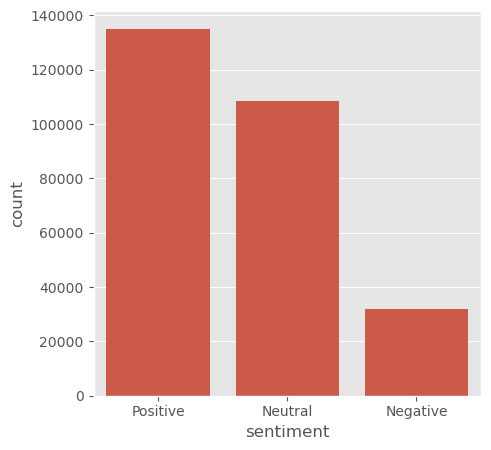

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=df)

Text(0.5, 1.0, 'Distribution of Sentiments')

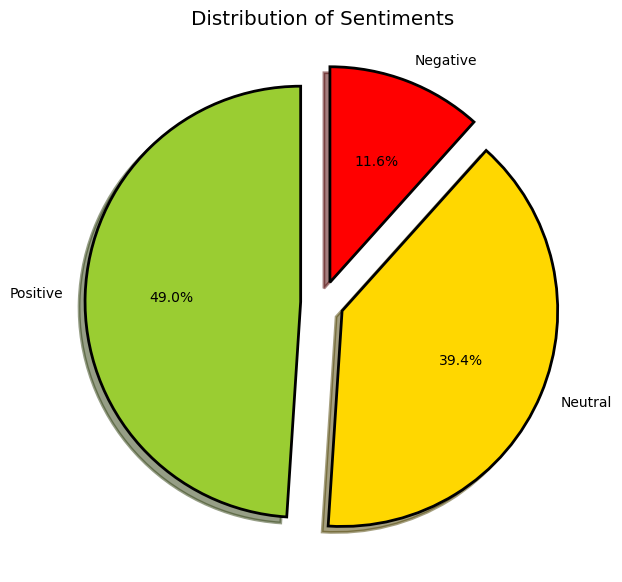

In [28]:
fig = plt.figure(figsize=(7,7))
colors=("yellowgreen", "gold" , "red")
wp= {'linewidth':2, 'edgecolor':"black"}
tags=df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow= True, colors = colors, startangle=90, wedgeprops = wp, explode=explode, label ='')
plt.title('Distribution of Sentiments')

In [29]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,polarity,sentiment
156355,156356,2019-01-11 11:00:01,3,thisnewyear indulge healthiest dishes best discounts icicibank foodie fridays information,ICICIBank,"[Photo(previewUrl='https://pbs.twimg.com/media/DwnbqvwUwAcDdzU?format=jpg&name=small', fullUrl='...",icici bank,thisnewyear indulge healthiest dishes best discounts icicibank foodie fridays information,"[thisnewyear, indulge, healthiest, dishes, best, discounts, icicibank, foodie, fridays, informat...","[thisnewyear, indulge, healthiest, dishes, best, discounts, icicibank, foodie, fridays, informat...","[thisnewyear, indulg, healthiest, dish, best, discount, icicibank, foodi, friday, inform]","[thisnewyear, indulge, healthiest, dish, best, discount, icicibank, foodie, friday, information]",1.0,Positive
271046,271047,2019-02-25 01:32:00,54,congratulations vice oscars winner best hair styling makeup,AMCTheatres,"[Photo(previewUrl='https://pbs.twimg.com/media/D0Nul5UUcAAPJOO?format=jpg&name=small', fullUrl='...",amc,congratulations vice oscars winner best hair styling makeup,"[congratulations, vice, oscars, winner, best, hair, styling, makeup]","[congratulations, vice, oscars, winner, best, hair, styling, makeup]","[congratul, vice, oscar, winner, best, hair, style, makeup]","[congratulation, vice, oscar, winner, best, hair, styling, makeup]",1.0,Positive
30278,30279,2018-03-07 18:07:25,189,wednesdaywisdom best director best feature winner spiritawards,filmindependent,"[Gif(thumbnailUrl='https://pbs.twimg.com/tweet_video_thumb/DXtGFqOVQAAg2LP.jpg', variants=[Video...",independent,wednesdaywisdom best director best feature winner spiritawards,"[wednesdaywisdom, best, director, best, feature, winner, spiritawards]","[wednesdaywisdom, best, director, best, feature, winner, spiritawards]","[wednesdaywisdom, best, director, best, featur, winner, spiritaward]","[wednesdaywisdom, best, director, best, feature, winner, spiritawards]",1.0,Positive
124315,124316,2019-05-14 21:27:18,4,perfect world tacotuesday every day,Toyota,"[Photo(previewUrl='https://pbs.twimg.com/media/D6jsQ-OW4Ag09Wu?format=jpg&name=small', fullUrl='...",toyota,perfect world tacotuesday every day,"[perfect, world, tacotuesday, every, day]","[perfect, world, tacotuesday, every, day]","[perfect, world, tacotuesday, everi, day]","[perfect, world, tacotuesday, every, day]",1.0,Positive
181566,181567,2019-08-29 15:05:05,324,awesome time paxton today thursdays heroes hoosmasterplan gohoos,ADWilliamsUVA,[Video(thumbnailUrl='https://pbs.twimg.com/ext_tw_video_thumb/1167090613017292800/pu/img/lCRkfSV...,williams,awesome time paxton today thursdays heroes hoosmasterplan gohoos,"[awesome, time, paxton, today, thursdays, heroes, hoosmasterplan, gohoos]","[awesome, time, paxton, today, thursdays, heroes, hoosmasterplan, gohoos]","[awesom, time, paxton, today, thursday, hero, hoosmasterplan, gohoo]","[awesome, time, paxton, today, thursday, hero, hoosmasterplan, gohoos]",1.0,Positive


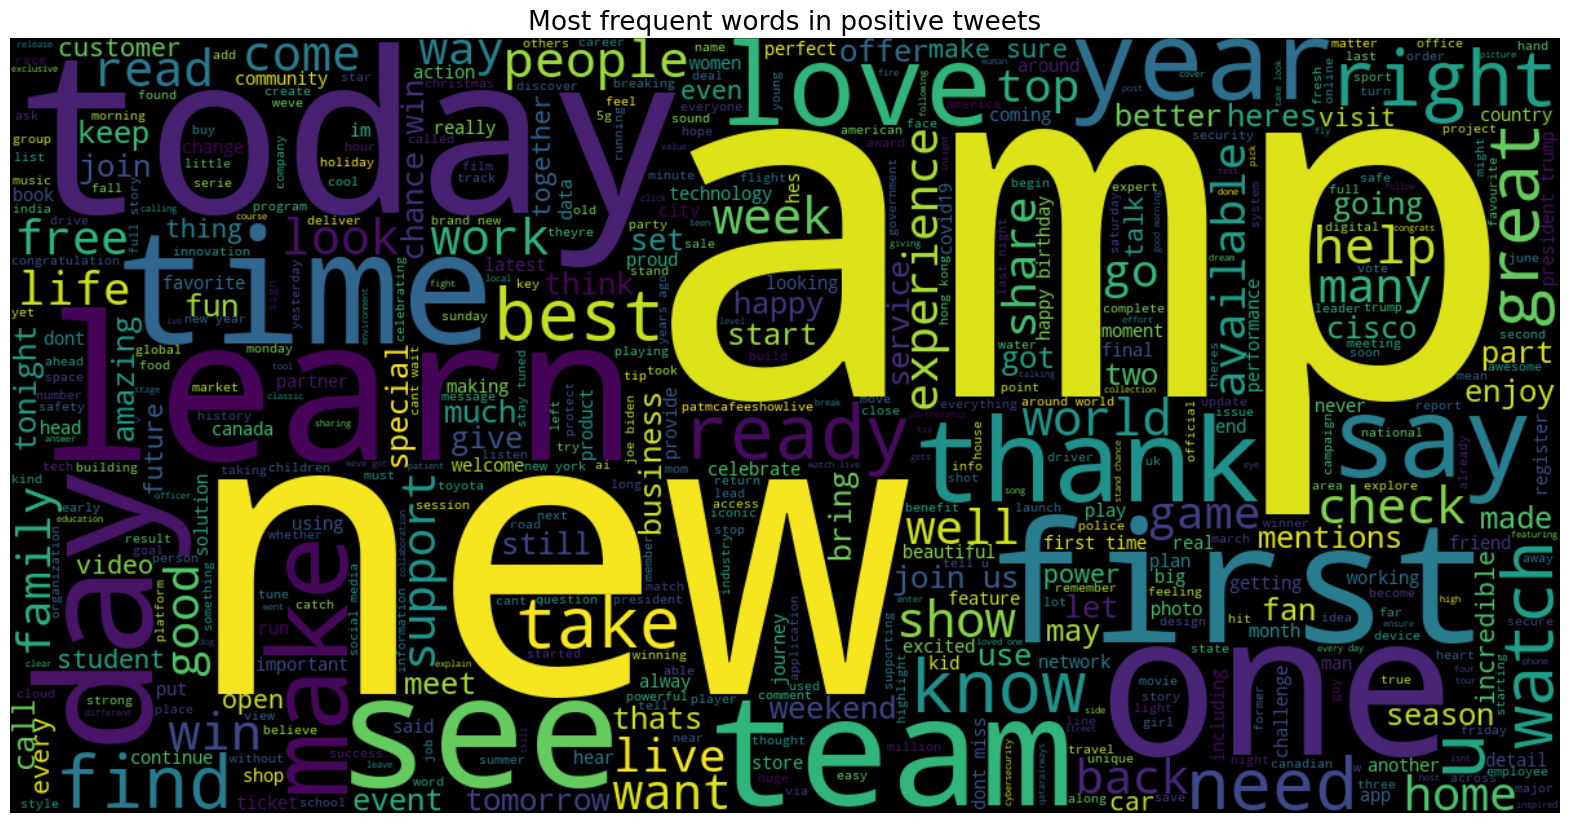

In [30]:
from wordcloud import WordCloud
text= ' '.join([word for word in pos_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width= 1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [31]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,polarity,sentiment
4236,4237,2019-12-26 08:02:04,5,poor quality stocks may perform short term long run sure hurt equity portfolio invest quality bu...,MotilalOswalAMC,"[Gif(thumbnailUrl='https://pbs.twimg.com/tweet_video_thumb/EMsrQc_UwAEkbGh.jpg', variants=[Video...",amc,poor quality stocks may perform short term long run sure hurt equity portfolio invest quality bu...,"[poor, quality, stocks, may, perform, short, term, long, run, sure, hurt, equity, portfolio, inv...","[poor, quality, stocks, may, perform, short, term, long, run, sure, hurt, equity, portfolio, inv...","[poor, qualiti, stock, may, perform, short, term, long, run, sure, hurt, equiti, portfolio, inve...","[poor, quality, stock, may, perform, short, term, long, run, sure, hurt, equity, portfolio, inve...",-2.312965e-18,Negative
221857,221858,2020-07-06 14:14:11,252,im normally guy tries buy every firework damn store shoot year long changed man patmcafeeshowlive,PatMcAfeeShow,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1280141428916736002/img/-WskCZhma...,mcafee,im normally guy tries buy every firework damn store shoot year long changed man patmcafeeshowlive,"[im, normally, guy, tries, buy, every, firework, damn, store, shoot, year, long, changed, man, p...","[im, normally, guy, tries, buy, every, firework, damn, store, shoot, year, long, changed, man, p...","[im, normal, guy, tri, buy, everi, firework, damn, store, shoot, year, long, chang, man, patmcaf...","[im, normally, guy, try, buy, every, firework, damn, store, shoot, year, long, changed, man, pat...",-4.625929e-18,Negative
210465,210466,2019-06-04 06:30:00,5,turn tuesdays green icicibank everyday delights offer use credit debit cards purchase groceries ...,ICICIBank,"[Photo(previewUrl='https://pbs.twimg.com/media/D8MbcA5UEAAq9go?format=jpg&name=small', fullUrl='...",icici bank,turn tuesdays green icicibank everyday delights offer use credit debit cards purchase groceries ...,"[turn, tuesdays, green, icicibank, everyday, delights, offer, use, credit, debit, cards, purchas...","[turn, tuesdays, green, icicibank, everyday, delights, offer, use, credit, debit, cards, purchas...","[turn, tuesday, green, icicibank, everyday, delight, offer, use, credit, debit, card, purchas, g...","[turn, tuesday, green, icicibank, everyday, delight, offer, use, credit, debit, card, purchase, ...",-5.551115e-18,Negative
87066,87067,2019-08-24 19:00:40,442,ukraine marked 28th anniversary independence former ussr official ceremony kyiv first time inclu...,RFERL,[Video(thumbnailUrl='https://pbs.twimg.com/ext_tw_video_thumb/1165337441965879299/pu/img/jz-9z_b...,free,ukraine marked th anniversary independence former ussr official ceremony kyiv first time include...,"[ukraine, marked, th, anniversary, independence, former, ussr, official, ceremony, kyiv, first, ...","[ukraine, marked, th, anniversary, independence, former, ussr, official, ceremony, kyiv, first, ...","[ukrain, mark, th, anniversari, independ, former, ussr, offici, ceremoni, kyiv, first, time, inc...","[ukraine, marked, th, anniversary, independence, former, ussr, official, ceremony, kyiv, first, ...",-5.551115e-18,Negative
79585,79586,2019-09-05 12:40:00,3942,feel sorry president pete buttigieg says president trump appearing show altered hurricane dorian...,CNNPolitics,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1169589488508706816/img/l6e0yIBrq...,cnn,feel sorry president pete buttigieg says president trump appearing show altered hurricane dorian...,"[feel, sorry, president, pete, buttigieg, says, president, trump, appearing, show, altered, hurr...","[feel, sorry, president, pete, buttigieg, says, president, trump, appearing, show, altered, hurr...","[feel, sorri, presid, pete, buttigieg, say, presid, trump, appear, show, alter, hurrican, dorian...","[feel, sorry, president, pete, buttigieg, say, preside

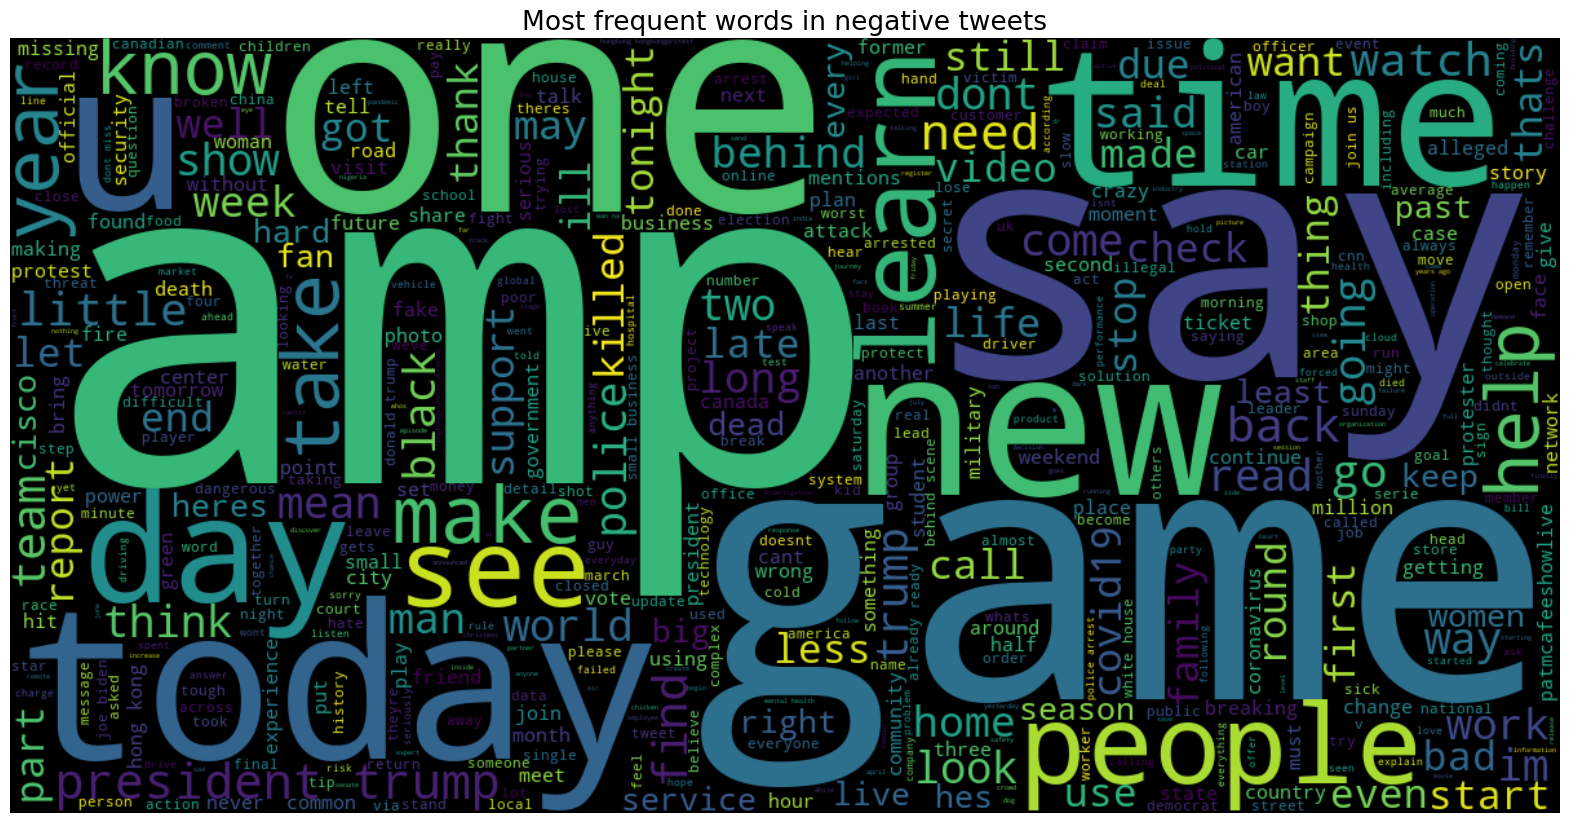

In [32]:
text= ' '.join([word for word in neg_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width= 1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [33]:
neut_tweets = df[df.sentiment == 'Neutral']
neut_tweets = neut_tweets.sort_values(['polarity'], ascending= False)
neut_tweets.head()

,id,date,likes,content,username,media,inferred company,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,polarity,sentiment
1,2,2018-06-30 10:04:20,2750,watch rapper freestyle hour,IndyMusic,"[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='...",independent,watch rapper freestyle hour,"[watch, rapper, freestyle, hour]","[watch, rapper, freestyle, hour]","[watch, rapper, freestyl, hour]","[watch, rapper, freestyle, hour]",0.0,Neutral
196684,196685,2018-10-23 08:38:15,123,severe flooding italy turned bridge waterfall,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1054652510290567168/img/TFSQSB4zW...,independent,severe flooding italy turned bridge waterfall,"[severe, flooding, italy, turned, bridge, waterfall]","[severe, flooding, italy, turned, bridge, waterfall]","[sever, flood, itali, turn, bridg, waterfal]","[severe, flooding, italy, turned, bridge, waterfall]",0.0,Neutral
196676,196677,2020-10-03 17:58:57,379,born 929 929 mentions 929 songoftheday listen amazon music,amazonmusic,"[Photo(previewUrl='https://pbs.twimg.com/media/EjbEOKAXsAEs0tS?format=jpg&name=small', fullUrl='...",amazon,born mentions songoftheday listen amazon music,"[born, mentions, songoftheday, listen, amazon, music]","[born, mentions, songoftheday, listen, amazon, music]","[born, mention, songoftheday, listen, amazon, music]","[born, mention, songoftheday, listen, amazon, music]",0.0,Neutral
196675,196676,2019-04-15 22:03:10,8133,french president emmanuel macron announced starting tomorrow launch international fundraising ca...,CNN,[Video(thumbnailUrl='https://pbs.twimg.com/amplify_video_thumb/1117910910129987584/img/GhrYQZ1-i...,cnn,french president emmanuel macron announced starting tomorrow launch international fundraising ca...,"[french, president, emmanuel, macron, announced, starting, tomorrow, launch, international, fund...","[french, president, emmanuel, macron, announced, starting, tomorrow, launch, international, fund...","[french, presid, emmanuel, macron, announc, start, tomorrow, launch, intern, fundrais, campaign,...","[french, president, emmanuel, macron, announced, starting, tomorrow, launch, international, fund...",0.0,Neutral
196674,196675,2020-05-03 18:40:34,0,nigerians attack assault 27 police personnel lockdown ig,IndependentNGR,"[Photo(previewUrl='https://pbs.twimg.com/media/EXHSgH7UcAg51Ev?format=jpg&name=small', fullUrl='...",independent,nigerians attack assault police personnel lockdown ig,"[nigerians, attack, assault, police, personnel, lockdown, ig]","[nigerians, attack, assault, police, personnel, lockdown, ig]","[nigerian, attack, assault, polic, personnel, lockdown, ig]","[nigerian, attack, assault, police, personnel, lockdown, ig]",0.0,Neutral


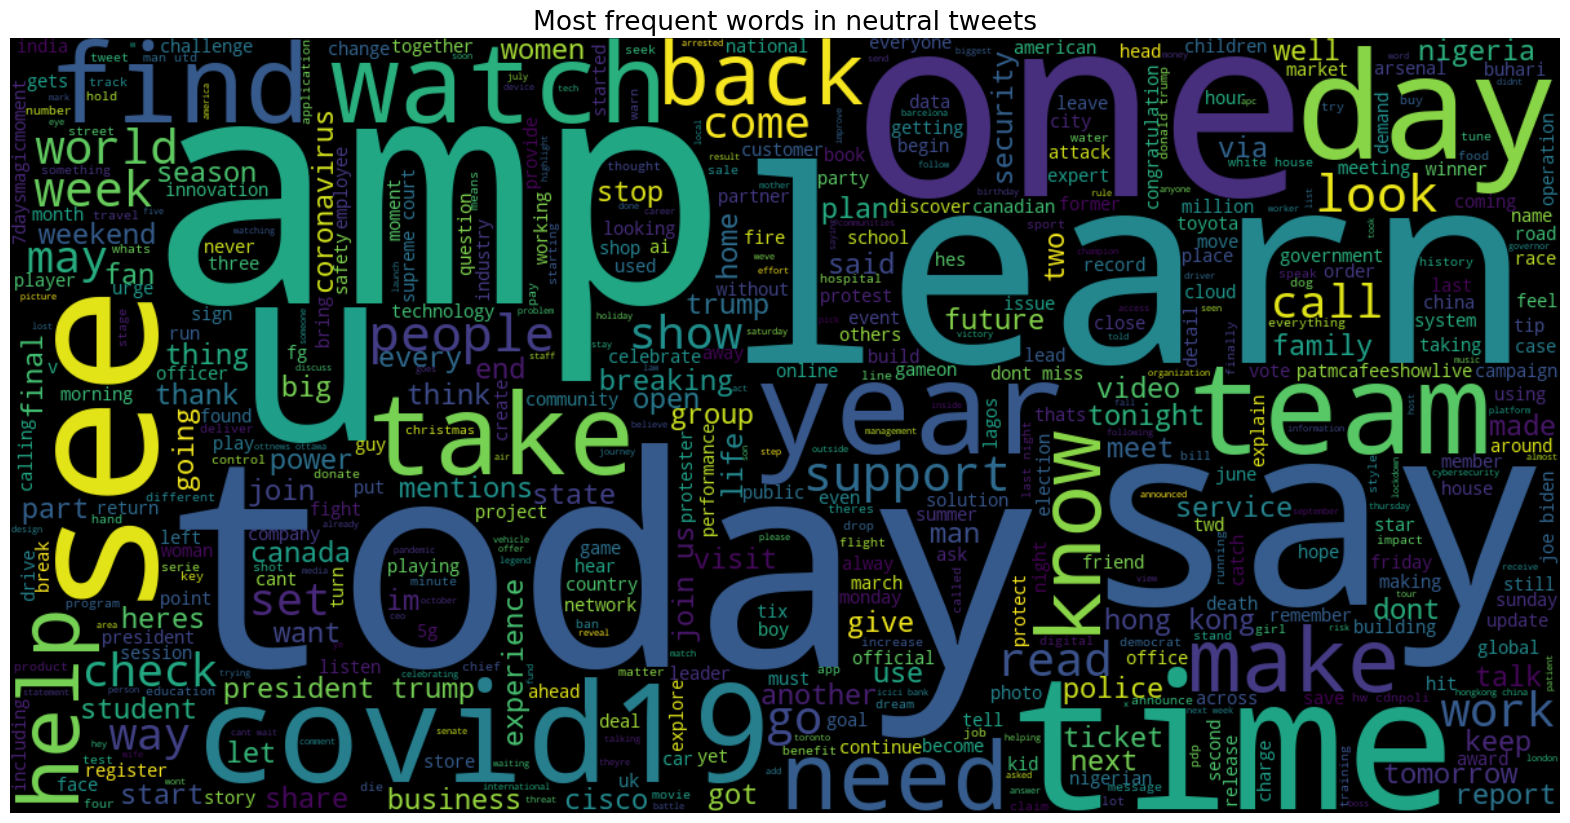

In [34]:
text= ' '.join([word for word in neut_tweets['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width= 1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()